<a href="https://colab.research.google.com/github/shiernee/AI_Tutorial/blob/main/AI_Workshop_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part 1: Google Colab Introductory Workshop**

The first part of the workshop will introduce important features in available in Colab. <br>

Colab is an interactive coding enviroment to get start to code easily. The code can be executed easily by click the *play* button on the cell. <br>

Let's get started.


 **Let's try to print *Hello World***


In [1]:
print('Hello World')

Hello World


In [2]:
# It's your turn to try. 
# Print your name. 
# Type your code below and click the play button to execute the cell. 
# You should see you name appear.
print('Shier Nee')

Shier Nee


In [3]:
#@title Solution
print('Richard Hunter')

Richard Hunter


**Perform Calculation**

In [4]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

In [5]:
# It's your turn to try. 
# Perform calculation of 45 divided by 20 and then multiplies by 8
# Type your code below and click the play button to execute the cell. 
# You should get an answer of 18.


In [6]:
#@title Solution
45/20*8

18.0

**Create a Loop**

In [7]:
# Creating a loop 
# Python always start from zero
# range(start, end, step)

for i in range(10):
  print(i)

0
1
2
3
4
5
6
7
8
9


In [8]:
# It's your turn to try. 
# Create a loop to print from 2 to 10 
# Type your code below and click the play button to execute the cell. 
# You should get an answer of 2,3,4,5,6,7,8,9,10.


In [9]:
#@title Solution
for i in range(2, 11):
  print(i)

2
3
4
5
6
7
8
9
10


In [10]:
# It's your turn to try. 
# Create a loop to print from 2 to 10, by skipping 2
# Type your code below and click the play button to execute the cell. 
# You should get an answer of 2,4,6,8,10


In [11]:
#@title Solution
for i in range(2, 11, 2):
  print(i)

2
4
6
8
10


**Create a list of values**

In [12]:
# Create a list of value from 0 to 9
x = []
for i in range(10):
  x.append(i)

print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [13]:
# Another compact way to create a list of value
x = [x for x in range(10)]
print(x) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [14]:
# It's your turn to try. 
# Create a list of value ranging from 2 to 10, by skipping 2
# Type your code below and click the play button to execute the cell. 
# Print out the list. You should get [2,4,6,8,10]


In [15]:
#@title Solution

x = [x for x in range(2, 11, 2)]
print(x) 

[2, 4, 6, 8, 10]


**Graph Visualization**

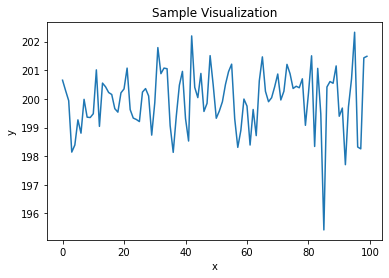

In [16]:
# We need to import packages
# numpy for creating array and matplotlib for plotting 

import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)  # create random numbers with a length of 100
x = [x for x in range(len(ys))]
x = np.array(x)

plt.plot(x, ys, '-')
plt.title("Sample Visualization")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [17]:
# It's your turn to try. 
# Create a list of x-value ranging from 0 to 500, by skipping 2
# Create a list of y-value using the formula y = 5x^2 
# square --> **; multiple --> *, divide --> /, plus --> +, minus --> -
# Type your code below and click the play button to execute the cell. 


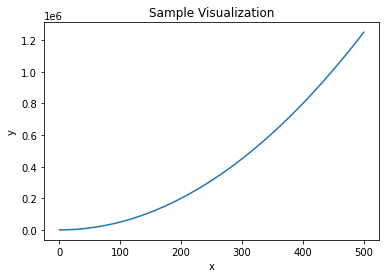

In [18]:
#@title Solution
import numpy as np
from matplotlib import pyplot as plt

x = [x for x in range(0, 501, 2)]
x = np.array(x)
ys = 5*(x**2)

plt.plot(x, ys, '-')
plt.title("Sample Visualization")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Uploading files from your local file system** <br>
files.upload returns a dictionary of the files which were uploaded. The dictionary is keyed by the file name and values are the data which were uploaded. <br>

Refresh the folder in the left panel and you will the dataset you have uploaded. 

In [19]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#**Part 2: Classification of MNIST Dreams with Convolutional Neural Networks**



Let's go back to powerpoint to understand the concepts. 



Now, we are ready. Let's build a convolutional neural network (CNN) classifier to classify images of handwritten digits in the MNIST dataset with a twist where we test our classifier on high-resolution hand-written digits from outside the dataset.

## 1. Import Data

In [20]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', cache=False)
X = mnist.data.astype('float32') # image
y = mnist.target.astype('int64')  # label

Text(0.5, 1.0, '7')

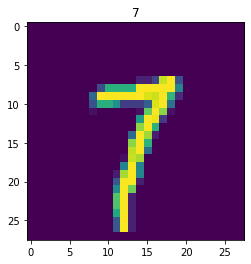

In [21]:
# randomly view datasets
# re-execute the cell to view other datasets
import matplotlib.pyplot as plt
import numpy as np

index = np.random.randint(0,len(X))

plt.imshow(X[index].reshape([28, 28]))
plt.title(y[index])

# 2. Data Splitting


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

(train_images_load, train_labels_load), (test_images_load, test_labels_load) = keras.datasets.mnist.load_data()

# reshape images to specify that it's a single channel
train_images_load = train_images_load.reshape(train_images_load.shape[0], 28, 28, 1)
test_images_load = test_images_load.reshape(test_images_load.shape[0], 28, 28, 1)

# Takes only the first 10000 training data and 6000 testing data due to limited computational resources

no_train = 10000
no_test = 6000

train_images = train_images_load[:no_train]
train_labels = train_labels_load[:no_train]
test_images = test_images_load[:no_test]
test_labels = test_labels_load[:no_test]


11501568/11490434 [==============================] - 0s 0us/step


### **Exercise**

Check if the number of samples in train and test image are 10,000 and 6,000 respectively

In [23]:
# type your code here 


In [24]:
#@title Solution
print('train_image: ', len(train_images))
print('test_images: ', len(test_images))


train_image:  10000
test_images:  6000


We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the *training set* and the *testing set* are preprocessed in the same way:

In [25]:
test_images.shape

(6000, 28, 28, 1)

In [26]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

Display the first 5 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

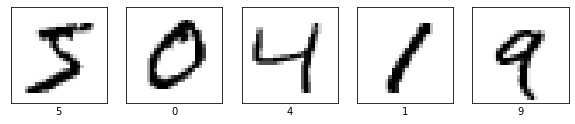

In [27]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

## 3. Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. In many cases, this can be reduced to simply stacking together layers:

In [28]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.

In [29]:
model.compile(optimizer= tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 4. Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [30]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
313/313 [==============================] - 25s 78ms/step - loss: 0.4723 - accuracy: 0.8567
Epoch 2/5
313/313 [==============================] - 24s 77ms/step - loss: 0.1616 - accuracy: 0.9543
Epoch 3/5
313/313 [==============================] - 24s 77ms/step - loss: 0.1156 - accuracy: 0.9649
Epoch 4/5
313/313 [==============================] - 24s 77ms/step - loss: 0.0918 - accuracy: 0.9722
Epoch 5/5
313/313 [==============================] - 24s 77ms/step - loss: 0.0683 - accuracy: 0.9792


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 97.88% on the training data.

## 5. Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [31]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(6000, 28, 28, 1)
188/188 [==============================] - 4s 18ms/step - loss: 0.0780 - accuracy: 0.9750
Test accuracy: 0.9750000238418579


Often times, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*. 

## 6. Visualize Prediction Results

Your task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction):

In [32]:
y_predict = model.predict(test_images)
y_predict = np.argmax(y_predict, axis=1)


### To get probability 

In [43]:
y_predict_prob = model.predict(test_images)

for n_s, sample in enumerate(y_predict_prob[:6]): #print the first 6 image probability
  print('sample: ', n_s)
  for n, i in enumerate(sample):
    print('probability for label %d: %2.2e' % (n, i))
    
  print('-----------------------------------')

sample:  0
probability for label 0: 1.60e-11
probability for label 1: 8.08e-11
probability for label 2: 3.47e-10
probability for label 3: 2.60e-08
probability for label 4: 4.40e-14
probability for label 5: 4.94e-12
probability for label 6: 8.52e-15
probability for label 7: 1.00e+00
probability for label 8: 1.35e-11
probability for label 9: 2.51e-09
-----------------------------------
sample:  1
probability for label 0: 1.97e-07
probability for label 1: 7.22e-07
probability for label 2: 1.00e+00
probability for label 3: 7.72e-08
probability for label 4: 1.81e-12
probability for label 5: 3.88e-13
probability for label 6: 8.59e-09
probability for label 7: 4.01e-10
probability for label 8: 1.91e-09
probability for label 9: 1.77e-12
-----------------------------------
sample:  2
probability for label 0: 2.23e-06
probability for label 1: 9.99e-01
probability for label 2: 4.32e-04
probability for label 3: 6.24e-06
probability for label 4: 2.32e-04
probability for label 5: 8.53e-06
probability

Display the first 5 images from the *testing set* and display the predicted class name below each image. 

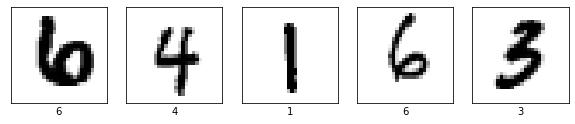

In [34]:
import random 

plt.figure(figsize=(10,2))
plt.title('Prediction')

randomlist = random.sample(range(0, len(test_images)), 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[randomlist[i]].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_predict[randomlist[i]])

## Acknowledgements

The contents of the Part 2: Classification tutorial is inspired and based on Lex Friedman's [tutorial_deep_learning_basic.ipynb](https://colab.research.google.com/github/lexfridman/mit-deep-learning/blob/master/tutorial_deep_learning_basics/deep_learning_basics.ipynb#scrollTo=IysPmcOBHBE9) 